#                                   HOUSE PRICE PRIDICTION

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 


# Data Load: Load Tehran home prices into a dataframe

In [2]:
df1=pd.read_csv('D:\Documents\houseprice.csv')
df1

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3500000000,116666.67
3475,83,2,True,True,True,Niavaran,6800000000,226666.67
3476,75,2,False,False,False,Parand,365000000,12166.67
3477,105,2,True,True,True,Dorous,5600000000,186666.67


In [3]:
df1.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

In [4]:
df1['Address'].unique()

array(['Shahran', 'Pardis', 'Shahrake Qods', 'Shahrake Gharb',
       'North Program Organization', 'Andisheh', 'West Ferdows Boulevard',
       'Narmak', 'Saadat Abad', 'Zafar', 'Islamshahr', 'Pirouzi',
       'Shahrake Shahid Bagheri', 'Moniriyeh', 'Velenjak', 'Amirieh',
       'Southern Janatabad', 'Salsabil', 'Zargandeh', 'Feiz Garden',
       'Water Organization', nan, 'ShahrAra', 'Gisha', 'Ray', 'Abbasabad',
       'Ostad Moein', 'Farmanieh', 'Parand', 'Punak', 'Qasr-od-Dasht',
       'Aqdasieh', 'Pakdasht', 'Railway', 'Central Janatabad',
       'East Ferdows Boulevard', 'Pakdasht KhatunAbad', 'Sattarkhan',
       'Baghestan', 'Shahryar', 'Northern Janatabad', 'Daryan No',
       'Southern Program Organization', 'Rudhen', 'West Pars', 'Afsarieh',
       'Marzdaran', 'Dorous', 'Sadeghieh', 'Chahardangeh', 'Baqershahr',
       'Jeyhoon', 'Lavizan', 'Shams Abad', 'Fatemi',
       'Keshavarz Boulevard', 'Kahrizak', 'Qarchak',
       'Northren Jamalzadeh', 'Azarbaijan', 'Bahar',
    

# Dimensionality Reduction

Any location having less than 10 data points should be tagged as "other" location. 
This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, 
it will help us with having fewer dummy columns

In [5]:
location_stats =df1['Address'].value_counts()
location_stats 

Punak                     161
Pardis                    146
West Ferdows Boulevard    145
Gheitarieh                141
Shahran                   130
                         ... 
Chardangeh                  1
Mehrabad                    1
Pakdasht KhatunAbad         1
Kazemabad                   1
Yakhchiabad                 1
Name: Address, Length: 192, dtype: int64

In [6]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Air force              10
Zafar                  10
Gholhak                10
Ozgol                  10
Gisha                   9
                       ..
Chardangeh              1
Mehrabad                1
Pakdasht KhatunAbad     1
Kazemabad               1
Yakhchiabad             1
Name: Address, Length: 128, dtype: int64

In [7]:
len(df1.Address.unique())

193

In [8]:
df1.Address = df1.Address.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df1.Address.unique())

66

In [9]:
df1.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33
5,70,2,True,True,False,North Program Organization,2050000000,68333.33
6,87,2,True,True,True,Pardis,600000000,20000.00
7,59,1,True,True,True,Shahran,2150000000,71666.67
8,54,2,True,True,False,Andisheh,493000000,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2370000000,79000.00


# Drop features that are not required to build our model

In [10]:
df_2 = df1.drop(['Warehouse','Elevator','Price'],axis='columns')
df_2.head()

,Area,Room,Parking,Address,Price(USD)
0,63,1,True,Shahran,61666.67
1,60,1,True,Shahran,61666.67
2,79,2,True,Pardis,18333.33
3,95,2,True,Shahrake Qods,30083.33
4,123,2,True,Shahrake Gharb,233333.33


Data Cleaning: Handle NA values

In [11]:
df_2.isnull().sum()

Area           0
Room           0
Parking        0
Address       23
Price(USD)     0
dtype: int64

In [12]:
df_2.shape

(3479, 5)

In [13]:
df2=df_2.dropna()
df2.shape

(3456, 5)

In [14]:
df2['Room'].unique()

array([1, 2, 3, 0, 4, 5], dtype=int64)

In [15]:
df2.loc[df2['Room'] ==0]


,Area,Room,Parking,Address,Price(USD)
103,40,0,False,Shahrake Qods,8266.67
137,40,0,False,Pakdasht,5500.00
1169,40,0,False,Ostad Moein,21666.67
2084,40,0,False,Pakdasht,5500.00
2103,43,0,False,other,12000.00
2625,50,0,True,Northern Chitgar,11500.00
2721,110,0,True,Parand,3400.00
3107,630,0,False,other,2520000.00
3211,30,0,False,Ostad Moein,16666.67
3435,54,0,False,Shahrake Qods,15666.67


# we have removed those house which has no room

In [16]:
df3=df2[df2['Room']>0]

In [17]:
df3

,Area,Room,Parking,Address,Price(USD)
0,63,1,True,Shahran,61666.67
1,60,1,True,Shahran,61666.67
2,79,2,True,Pardis,18333.33
3,95,2,True,Shahrake Qods,30083.33
4,123,2,True,Shahrake Gharb,233333.33
...,...,...,...,...,...
3474,86,2,True,Southern Janatabad,116666.67
3475,83,2,True,Niavaran,226666.67
3476,75,2,False,Parand,12166.67
3477,105,2,True,Dorous,186666.67


In [18]:
df3= df3.rename(columns = {'Price(USD)':'Price'})

In [19]:
df3 

,Area,Room,Parking,Address,Price
0,63,1,True,Shahran,61666.67
1,60,1,True,Shahran,61666.67
2,79,2,True,Pardis,18333.33
3,95,2,True,Shahrake Qods,30083.33
4,123,2,True,Shahrake Gharb,233333.33
...,...,...,...,...,...
3474,86,2,True,Southern Janatabad,116666.67
3475,83,2,True,Niavaran,226666.67
3476,75,2,False,Parand,12166.67
3477,105,2,True,Dorous,186666.67


In [20]:
df3.dtypes

Area        object
Room         int64
Parking       bool
Address     object
Price      float64
dtype: object

In [21]:
df3["Area"] = pd.to_numeric(df3.Area, errors='coerce')

In [22]:
df3.dtypes

Area       float64
Room         int64
Parking       bool
Address     object
Price      float64
dtype: object

# Feature Engineering

Add new feature called price per square feet

In [23]:
df4 = df3.copy()
df4['price_per_sqft']=df4['Price']*75/df4['Area']
df4.head()

,Area,Room,Parking,Address,Price,price_per_sqft
0,63.0,1,True,Shahran,61666.67,73412.702381
1,60.0,1,True,Shahran,61666.67,77083.337500
2,79.0,2,True,Pardis,18333.33,17405.060127
3,95.0,2,True,Shahrake Qods,30083.33,23749.997368
4,123.0,2,True,Shahrake Gharb,233333.33,142276.420732


In [24]:
df4.price_per_sqft.describe()

count    3.441000e+03
mean     1.033158e+05
std      7.908081e+04
min      2.500000e-03
25%      5.000001e+04
50%      8.690476e+04
75%      1.375000e+05
max      1.041667e+06
Name: price_per_sqft, dtype: float64

# Outlier Removal Using Standard Deviation and Mean

Here we find that min price per sqft is 56 rs/sqft whereas max is 1041667, this shows a wide variation in property prices.
We should remove outliers per location using mean and one standard deviation

In [25]:
df4.shape

(3446, 6)

In [26]:
df4[df4['Parking']==False]

,Area,Room,Parking,Address,Price,price_per_sqft
12,54.0,1,False,Narmak,56333.33,78240.736111
15,63.0,1,False,Islamshahr,19000.00,22619.047619
17,64.0,2,False,Pirouzi,48333.33,56640.621094
19,42.0,1,False,Pirouzi,46333.33,82738.089286
30,90.0,2,False,Salsabil,50000.00,41666.666667
...,...,...,...,...,...,...
3464,94.0,2,False,Damavand,19833.33,15824.465426
3465,68.0,2,False,Beryanak,41933.33,46249.996324
3466,61.0,2,False,Andisheh,15333.33,18852.454918
3476,75.0,2,False,Parand,12166.67,12166.670000


In [27]:
m=np.mean(df4.price_per_sqft)
st=np.std(df4.price_per_sqft)

df5 = df4[(df4.price_per_sqft>(m-st)) & (df4.price_per_sqft<=(m+st))]
df5.shape
    

(2585, 6)

In [28]:
df5[df5['Area']>300]

,Area,Room,Parking,Address,Price,price_per_sqft
732,420.0,5,True,Andisheh,366666.67,65476.191071
742,400.0,5,True,Ekhtiarieh,616666.67,115625.000625
1236,600.0,2,True,Qalandari,305000.00,38125.000000
1435,403.0,5,True,Andisheh,433333.33,80645.160670
1437,405.0,5,True,Andisheh,366666.67,67901.235185
1438,400.0,5,True,Andisheh,366666.67,68750.000625
1970,450.0,2,False,other,150000.00,25000.000000
1973,500.0,4,True,Damavand,666666.67,100000.000500
2476,450.0,4,True,Niavaran,833333.33,138888.888333
2647,700.0,3,True,Damavand,233333.33,24999.999643


we want to remove in which area is greater than 300 sqft either area greater than 50 sqft and have no parking

In [29]:
df6=df5[~(df5['Area']>250)]
df6

,Area,Room,Parking,Address,Price,price_per_sqft
0,63.0,1,True,Shahran,61666.67,73412.702381
1,60.0,1,True,Shahran,61666.67,77083.337500
4,123.0,2,True,Shahrake Gharb,233333.33,142276.420732
5,70.0,2,True,North Program Organization,68333.33,73214.282143
7,59.0,1,True,Shahran,71666.67,91101.699153
...,...,...,...,...,...,...
3470,97.0,2,True,Shahran,90000.00,69587.628866
3472,113.0,3,True,Ostad Moein,105666.67,70132.745575
3473,63.0,1,True,Feiz Garden,63000.00,75000.000000
3474,86.0,2,True,Southern Janatabad,116666.67,101744.188953


In [30]:
df7=df6[~((df6.Area>50) & (df6.Parking==False))]
df7.shape

(2307, 6)

In [31]:
df7.groupby(['Room']).sum()

,Area,Parking,Price,price_per_sqft
Room,,,,
1,26097.0,384,2.799660e+07,3.715880e+07
2,123628.0,1368,1.539253e+08,1.258793e+08
3,63613.0,441,1.056058e+08,5.332062e+07
4,3267.0,17,3.217333e+06,1.239164e+06
5,615.0,3,1.056667e+06,4.001562e+05


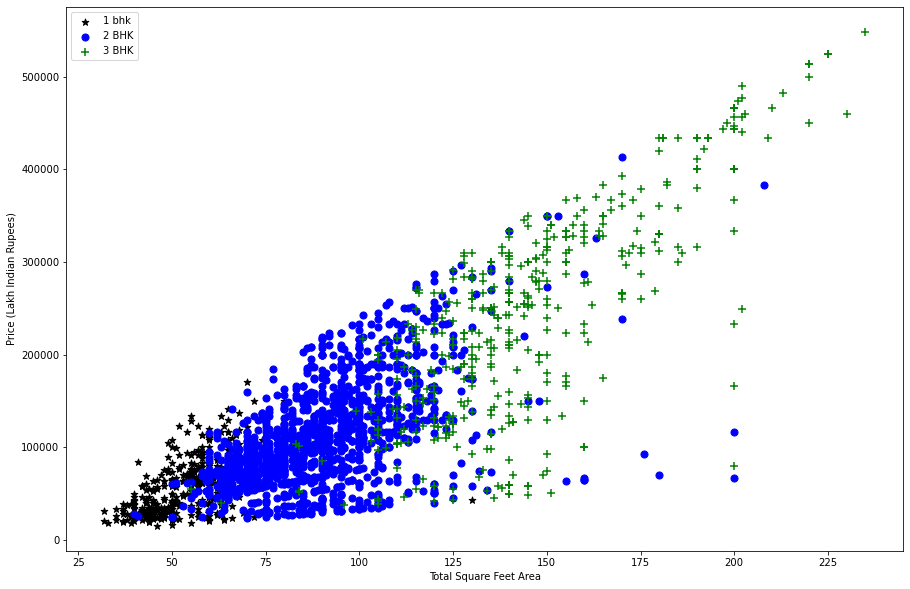

In [32]:
def plot_scatter_chart(df):
    bhk1=df[(df.Room==1)]
    bhk2 = df[(df.Room==2)]
    bhk3 = df[(df.Room==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk1.Area,bhk1.Price,color='black',marker='*',label='1 bhk',s=50)
    plt.scatter(bhk2.Area,bhk2.Price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.Area,bhk3.Price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
 
    plt.legend()
plot_scatter_chart(df7)    

# We should also remove properties where 
Now we can remove those 2 room apartments whose price_per_sqft is less than mean price_per_sqft of 1 room apartment
Now we can remove those 3 BHK apartments whose price_per_sqft is less than mean price_per_sqft of2 BHK apartment

In [33]:
df7.groupby('Room')['price_per_sqft'].agg("mean")

Room
1     78394.093182
2     91748.777905
3    120908.446657
4     72891.973947
5    133385.385051
Name: price_per_sqft, dtype: float64

In [34]:
df7.groupby('Room')['Area'].agg("mean")

Room
1     55.056962
2     90.107872
3    144.247166
4    192.176471
5    205.000000
Name: Area, dtype: float64

In [35]:
df8=df7[~((df7.price_per_sqft<77993) &(df7.Room>1))][~((df7.price_per_sqft<91283) &(df7.Room>2))]                  
df9=df8[~((df7.Area<55) &(df7.Room>1))][~((df7.Area<90) &(df7.Room>2))]                   
df9

C:\Users\hp\AppData\Local\Temp\ipykernel_17072\4236329554.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df8=df7[~((df7.price_per_sqft<77993) &(df7.Room>1))][~((df7.price_per_sqft<91283) &(df7.Room>2))]
C:\Users\hp\AppData\Local\Temp\ipykernel_17072\4236329554.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df9=df8[~((df7.Area<55) &(df7.Room>1))][~((df7.Area<90) &(df7.Room>2))]


,Area,Room,Parking,Address,Price,price_per_sqft
0,63.0,1,True,Shahran,61666.67,73412.702381
1,60.0,1,True,Shahran,61666.67,77083.337500
4,123.0,2,True,Shahrake Gharb,233333.33,142276.420732
7,59.0,1,True,Shahran,71666.67,91101.699153
9,71.0,1,True,West Ferdows Boulevard,79000.00,83450.704225
...,...,...,...,...,...,...
3468,81.0,2,True,West Ferdows Boulevard,148500.00,137500.000000
3469,74.0,2,True,other,135666.67,137500.003378
3473,63.0,1,True,Feiz Garden,63000.00,75000.000000
3474,86.0,2,True,Southern Janatabad,116666.67,101744.188953


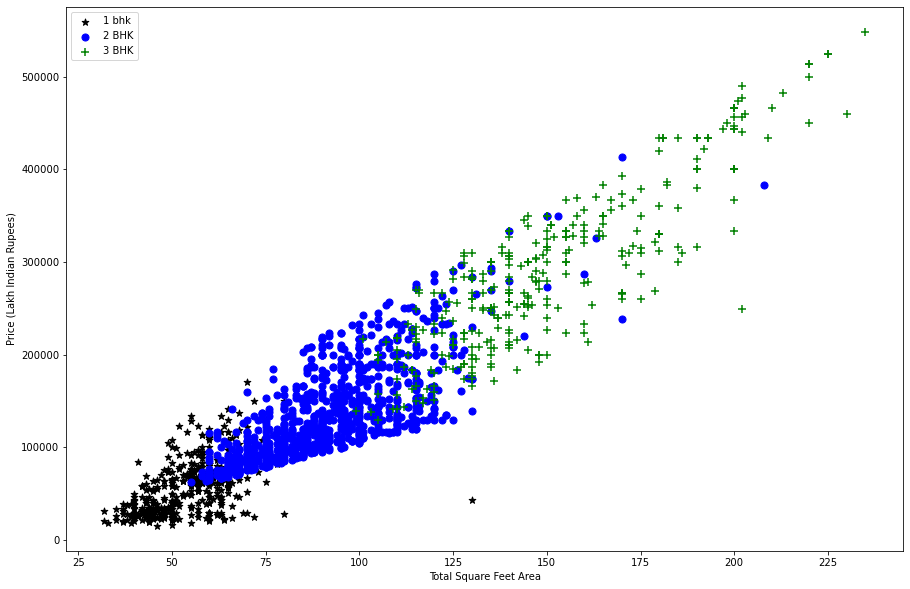

In [36]:
plot_scatter_chart(df9)

Text(0, 0.5, 'Count')

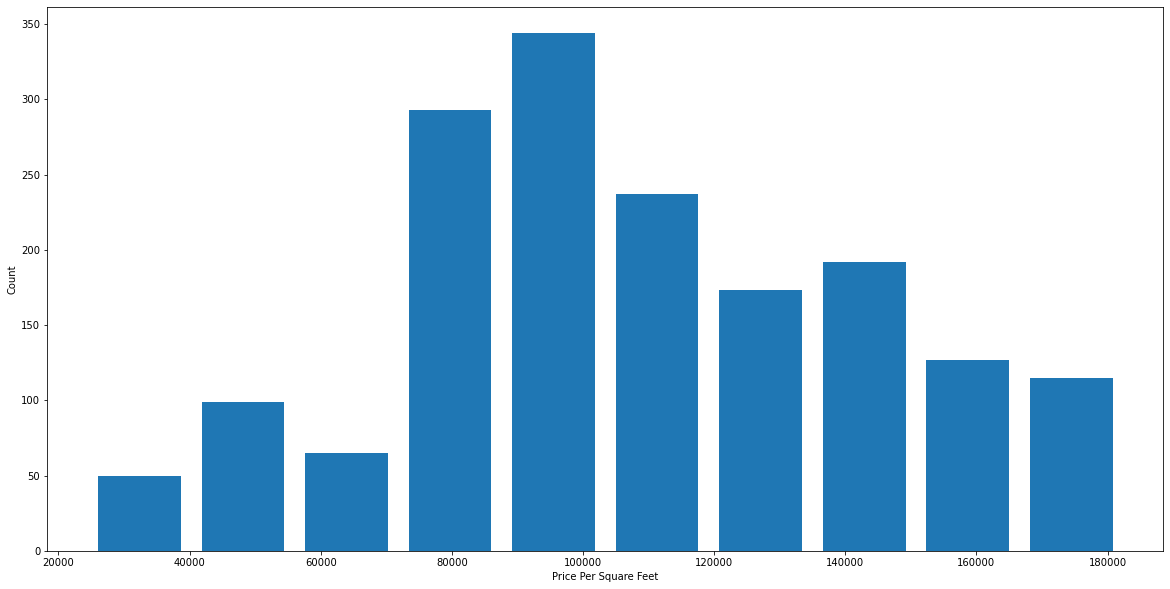

In [37]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df9.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [38]:
df9[((df9.Parking==False) & (df9.Area<=50))]

,Area,Room,Parking,Address,Price,price_per_sqft
19,42.0,1,False,Pirouzi,46333.33,82738.089286
117,48.0,1,False,Jeyhoon,28333.33,44270.828125
409,48.0,1,False,other,32666.67,51041.671875
557,50.0,1,False,Pirouzi,42000.00,63000.000000
673,45.0,1,False,Ostad Moein,40000.00,66666.666667
...,...,...,...,...,...,...
3261,48.0,1,False,Beryanak,24666.67,38541.671875
3279,44.0,1,False,Qasr-od-Dasht,33333.33,56818.176136
3323,42.0,1,False,other,21333.33,38095.232143
3365,50.0,1,False,Pirouzi,36666.67,55000.005000


we can see that there is only 90 house without Parking and Area less than 50 so its ok 

In [39]:
df_10 = df9.drop(['Parking','price_per_sqft'],axis='columns')
df_10.shape

(1695, 4)

droping some row that are statistically insignificant 

In [58]:
df10=df_10[(df_10.Address !='Southern Program Organization') & (df_10.Address !='Azarbaijan') 
           & (df_10.Address !='North Program Organization') & 
           (df_10.Address !='Northren Jamalzadeh')]
df10.shape

(1634, 4)


# Build a Model Now.....

# Use One Hot Encoding For Location

In [41]:
dummies = pd.get_dummies(df10.Address)
dummies.head(3)

,Abazar,Amirabad,Andisheh,Aqdasieh,Beryanak,Central Janatabad,Damavand,Dorous,East Ferdows Boulevard,Ekhtiarieh,...,Shahryar,Si Metri Ji,Southern Janatabad,Tenant,Velenjak,West Ferdows Boulevard,West Pars,Yousef Abad,Zaferanieh,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,Area,Room,Address,Price,Abazar,Amirabad,Andisheh,Aqdasieh,Beryanak,Central Janatabad,...,Shahran,Shahryar,Si Metri Ji,Southern Janatabad,Tenant,Velenjak,West Ferdows Boulevard,West Pars,Yousef Abad,Zaferanieh
0,63.0,1,Shahran,61666.67,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,60.0,1,Shahran,61666.67,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,123.0,2,Shahrake Gharb,233333.33,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,59.0,1,Shahran,71666.67,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,71.0,1,West Ferdows Boulevard,79000.00,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [43]:
df12 = df11.drop('Address',axis='columns')
df12.head(2)

,Area,Room,Price,Abazar,Amirabad,Andisheh,Aqdasieh,Beryanak,Central Janatabad,Damavand,...,Shahran,Shahryar,Si Metri Ji,Southern Janatabad,Tenant,Velenjak,West Ferdows Boulevard,West Pars,Yousef Abad,Zaferanieh
0,63.0,1,61666.67,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,60.0,1,61666.67,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [44]:
df12.shape

(1634, 57)

In [45]:
X=df12.drop('Price',axis='columns')
X

,Area,Room,Abazar,Amirabad,Andisheh,Aqdasieh,Beryanak,Central Janatabad,Damavand,Dorous,...,Shahran,Shahryar,Si Metri Ji,Southern Janatabad,Tenant,Velenjak,West Ferdows Boulevard,West Pars,Yousef Abad,Zaferanieh
0,63.0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,60.0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,123.0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,59.0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,71.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3468,81.0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3469,74.0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3473,63.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3474,86.0,2,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [46]:
y=df12.Price
y

0        61666.67
1        61666.67
4       233333.33
7        71666.67
9        79000.00
          ...    
3468    148500.00
3469    135666.67
3473     63000.00
3474    116666.67
3477    186666.67
Name: Price, Length: 1634, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [48]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     262.9
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:43:10   Log-Likelihood:                -15195.
No. Observations:                1307   AIC:                         3.050e+04
Df Residuals:                    1250   BIC:                         3.080e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [49]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9208923588530398

In [50]:
from sklearn.tree import DecisionTreeRegressor
dt_clf = DecisionTreeRegressor()
dt_clf.fit(X_train,y_train)
dt_clf.score(X_test,y_test)

0.8710784981092005

In [51]:
from sklearn.linear_model import Ridge
 
# Train the model
ridgeR = Ridge(alpha =0.1)
ridgeR.fit(X_train, y_train)
ridgeR.score(X_test,y_test)

0.9208470534587688

In [52]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha=0.1)
ls.fit(X_train, y_train)
ls.score(X_test,y_test)

0.9208869225800085

# Use K Fold cross validation to measure accuracy of our LinearRegression model

In [54]:
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(), X, y, cv=5)

array([0.92073927, 0.90415122, 0.89806144, 0.92338973, 0.90285249])

In [55]:
cross_val_score(DecisionTreeRegressor(), X, y, cv=5)


array([0.84298408, 0.83872865, 0.8281283 , 0.83219092, 0.87380167])

Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

In [56]:
def predict_price(location,Area,Room):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = Area
    x[1] = Room
    
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])

In [57]:
predict_price('Andisheh',140, 2)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([204998.06794141])